# Exploratory Data Analysis (EDA) of the Web Payloads Dataset

In this analysis, I delve deep into the intricacies of web payloads. The goal is to unravel the unique features and patterns that differentiate benign payloads from their malicious counterparts. By examining aspects like payload length, content, and category, I seek to discover potential markers that signify the intent of a request.

The dataset used in this project was sourced from multiple public datasets, as detailed in the `download.sh` script. This data has been merged and cleaned to create a comprehensive dataset of web payloads via the `merge.ipynb` notebook. The dataset consists of web payloads, each distinctly labeled as 'benign' or 'malicious'. For a more detailed view, malicious requests are further segmented into specific attack types, such as SQL Injection, XSS, and the like.

## 1. Setup and Load the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import warnings
import re
from collections import Counter
from urllib.parse import unquote_plus
from wordcloud import WordCloud

# Set visual style for seaborn
sns.set_style("darkgrid")

# Handle warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

# Load data
data = pd.read_csv("../data/dataset.csv")

## 2. Initial Data Overview
An initial overview of the dataset allows us to familiarize ourselves with its structure and contents. This provides a foundation for the in-depth analyses that follow.

In [2]:
# Display the first few rows of the dataframe
data.head()

,payload,label,category
0,tebawe=pbCugxPW,benign,benign
1,annal,benign,benign
2,Ripollet,benign,benign
3,Evangelista,benign,benign
4,03610,benign,benign


In [3]:
# Display summary statistics of the data
data.describe()

,payload,label,category
count,133976,133976,133976
unique,133976,2,4
top,tebawe=pbCugxPW,benign,benign
freq,1,117377,113784


In [4]:
# Check for missing values (per column)
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

payload     0
label       0
category    0
dtype: int64


In [5]:
# Unique values in categorical columns
print("Unique Labels:", data["label"].unique())
print("Unique Categories:", data["category"].unique())

Unique Labels: ['benign' 'malicious']
Unique Categories: ['benign' 'xss' 'sql' 'shell']


## 3. Exploratory Analysis and Visualization

### 3.1 Examples from Each Class

In [6]:
# Displaying random samples from each class
benign_samples = data[data["label"] == "benign"].sample(5)
malicious_samples = data[data["label"] == "malicious"].sample(5)
for i in range(5):
    print("Benign Sample #", i + 1)
    print(textwrap.fill(benign_samples.iloc[i]["payload"], 100))
    print("-" * 100)
    print("Malicious Sample #", i + 1)
    print(textwrap.fill(malicious_samples.iloc[i]["payload"], 100))
    print("-" * 100)

Benign Sample # 1
deedee
----------------------------------------------------------------------------------------------------
Malicious Sample # 1
http://aa<script>alert(123)</script>
----------------------------------------------------------------------------------------------------
Benign Sample # 2
9135101585976882
----------------------------------------------------------------------------------------------------
Malicious Sample # 2
/%c0%ae/WEB-INF/web.xml'
----------------------------------------------------------------------------------------------------
Benign Sample # 3
basEl%E1Ceo
----------------------------------------------------------------------------------------------------
Malicious Sample # 3
<html id=x tabindex=1 onbeforedeactivate=alert(1)></html><input autofocus>
----------------------------------------------------------------------------------------------------
Benign Sample # 4
chakraba
-----------------------------------------------------------------------------

### 3.2 Distribution of Labels and Categories

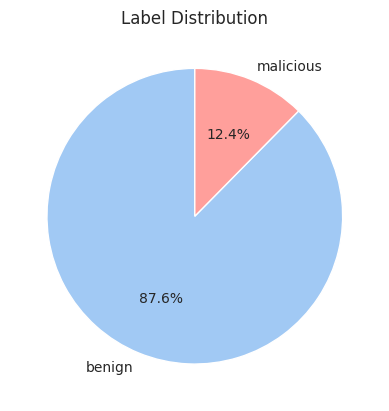

Number of benign samples: 117377
Number of malicious samples: 16599
Percentage of malicious samples: 12.39%


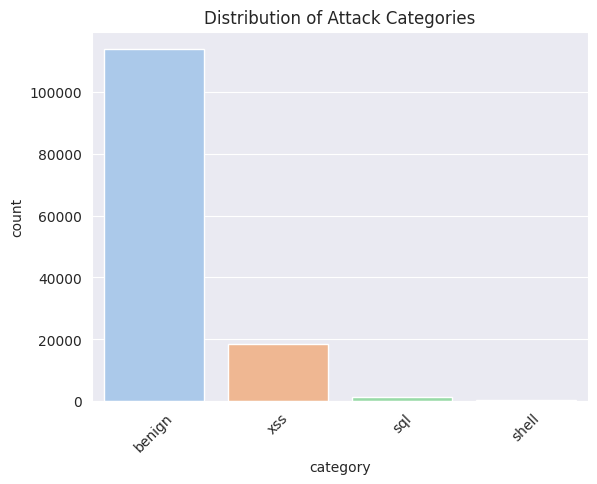

Number of benign samples: 113784
Number of xss samples: 18506
Number of sql samples: 1367
Number of shell samples: 319


In [7]:
# Visualization of label distribution
label_counts = data["label"].value_counts()
plt.pie(
    label_counts.values,
    labels=label_counts.index.tolist(),
    autopct="%1.1f%%",
    startangle=90,
    colors=[sns.color_palette("pastel")[0], sns.color_palette("pastel")[3]],
)
plt.title("Label Distribution")
plt.show()

## Print statistics for label distribution
print("Number of benign samples:", label_counts["benign"])
print("Number of malicious samples:", label_counts["malicious"])
print("Percentage of malicious samples: {:.2f}%".format(label_counts["malicious"] / label_counts.sum() * 100))

# Visualization of attack categories distribution
category_counts = data["category"].value_counts()
sns.barplot(x=category_counts.index, y=category_counts, hue=category_counts.index, palette="pastel")
plt.title("Distribution of Attack Categories")
plt.xticks(rotation=45)
plt.show()

# Print statistics for attack categories distribution
print("Number of benign samples:", category_counts["benign"])
print("Number of xss samples:", category_counts["xss"])
print("Number of sql samples:", category_counts["sql"])
print("Number of shell samples:", category_counts["shell"])

A large majority of the samples are benign, which indicates the need for careful handling of class imbalance during modeling.

### 3.3 Payload Length Analysis

count    133976.000000
mean         37.781535
std          89.530267
min           1.000000
50%          10.000000
90%          92.000000
95%         184.000000
99%         302.000000
max        5911.000000
Name: payload_length, dtype: float64

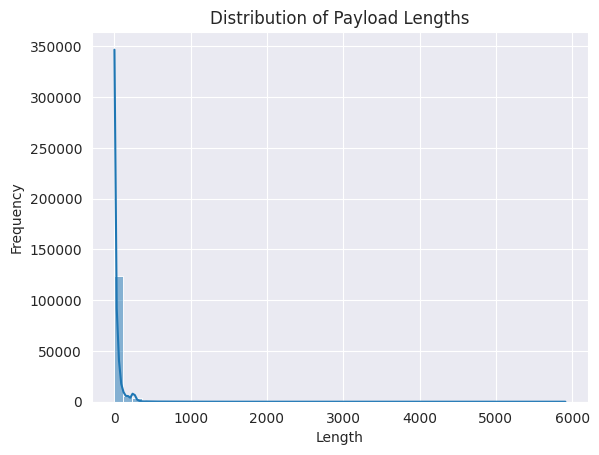

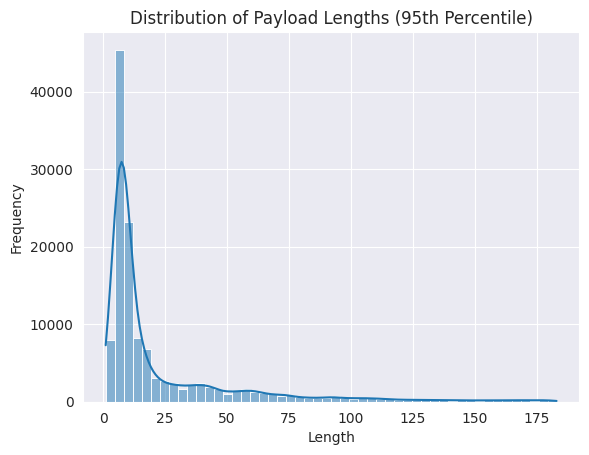

In [8]:
# Analyzing the length of payloads
data["payload_length"] = data["payload"].apply(len)
stats = data["payload_length"].describe(percentiles=[0.9, 0.95, 0.99])
display(stats)

# Distribution of payload lengths
sns.histplot(data["payload_length"], bins=50, kde=True)
plt.title("Distribution of Payload Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# Distribution for 95th percentile
sns.histplot(data["payload_length"][data["payload_length"] < stats["95%"]], bins=50, kde=True)
plt.title("Distribution of Payload Lengths (95th Percentile)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

The histograms above shows the distribution of payload lengths. Most of the payloads are short, but there's a long tail, indicating the presence of some unusually long payloads.

### 3.4 URL Encoding Analysis

URL encoding is a common method to obfuscate malicious payloads. Here, we aim to identify which payloads are encoded and decode them for further analysis.

Number of URL encoded payloads: 21504 out of 133976


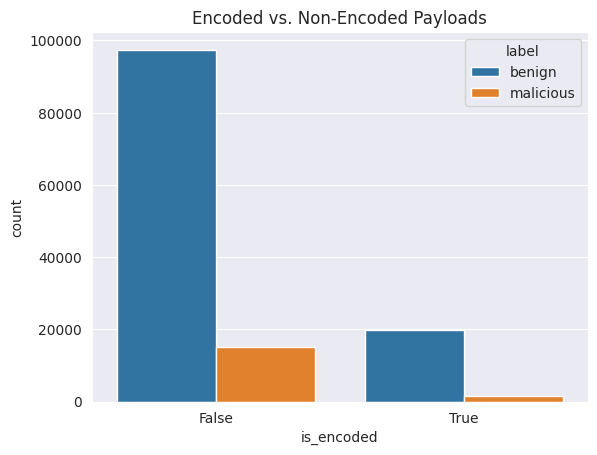

Original Payload:
d%E9cada

Decoded Payload:
d�cada
----------------------------------------------------------------------------------------------------
Original Payload:
aeo8t=+%3Ee6m&6atiemry=yip4fresrhoikgo&havingKL2oW-
=l5Q.T00&1abdwezhtdhos=o50Bapbm&wroc=ero%3Cer%28&uf=+cc+%3D&glezhyd7heoygbs=u2tqGKxnrh%40&ZOj7Ci4d7=
betweenCNIfen

Decoded Payload:
aeo8t= >e6m&6atiemry=yip4fresrhoikgo&havingKL2oW-=l5Q.T00&1abdwezhtdhos=o50Bapbm&wroc=ero<er(&uf= cc
=&glezhyd7heoygbs=u2tqGKxnrh@&ZOj7Ci4d7=betweenCNIfen
----------------------------------------------------------------------------------------------------
Original Payload:
modo=registro&login=ginelle&password=zapato&nombre=Randie&apellidos=Casany+Carabi&email=fernside%40b
-sign.coop&dni=42779264T&direccion=Avda.+Sancho+El+Fuerte%2C+12%2C+1C&ciudad=Miguel%E1%F1ez&cp=09150
&provincia=Lugo&ntc=7599572513489262&B1=Registrar

Decoded Payload:
modo=registro&login=ginelle&password=zapato&nombre=Randie&apellidos=Casany
Carabi&email=fernside@b-s

In [9]:
def get_num_url_encoded_chars(payload):
    pattern = re.compile(r"%[0-9A-Fa-f]{2}")
    return len(pattern.findall(payload))


data["num_encoded"] = data["payload"].apply(get_num_url_encoded_chars)
data["is_encoded"] = data["num_encoded"] > 0
encoded_count = data["is_encoded"].sum()

print(f"Number of URL encoded payloads: {encoded_count} out of {len(data)}")

# Visualize encoded vs. non-encoded payloads
sns.countplot(data=data, x="is_encoded", hue="label")
plt.title("Encoded vs. Non-Encoded Payloads")
plt.show()

# Decode URL encoded payloads for further analysis
data["decoded_payload"] = data["payload"].apply(lambda x: unquote_plus(x))

# Display sample of decoded payloads
encoded_samples = data[data["is_encoded"]].sample(5)
for _, row in encoded_samples.iterrows():
    print("Original Payload:")
    print(textwrap.fill(row["payload"], 100))
    print("\nDecoded Payload:")
    print(textwrap.fill(row["decoded_payload"], 100))
    print("-" * 100)

URL encoding is more prevalent than initially thought, and decoding is crucial for more granular analysis.

 ### 3.5 Relationship between Columns

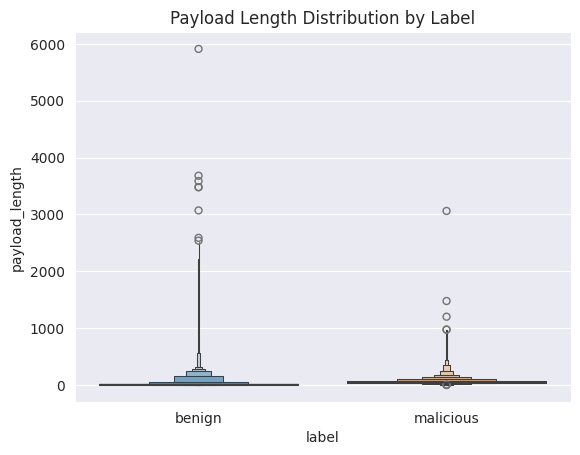

Payload Length Statistics by Label


,count,mean,std,min,50%,90%,95%,99%,max
label,,,,,,,,,
benign,117377.0,33.778125,91.817576,1.0,9.0,78.0,196.0,301.00,5911.0
malicious,16599.0,66.090969,64.560121,1.0,52.0,114.0,162.0,309.02,3061.0


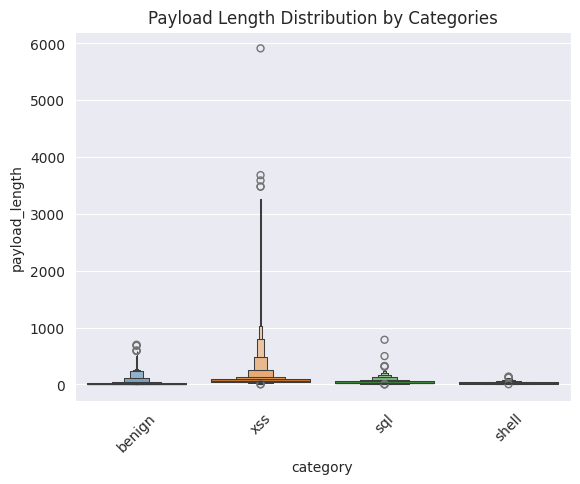

Payload Length Statistics by Category


,count,mean,std,min,50%,90%,95%,99%,max
category,,,,,,,,,
benign,113784.0,26.944904,55.151014,1.0,9.0,59.0,166.0,269.00,697.0
shell,319.0,29.191223,23.075984,3.0,23.0,51.2,77.0,118.46,138.0
sql,1367.0,45.587418,50.082051,1.0,30.0,92.0,154.0,225.42,785.0
xss,18506.0,103.981952,184.460648,1.0,58.0,168.0,322.0,953.90,5911.0


In [10]:
# Boxen plot to visualize the distribution of payload lengths by label
sns.boxenplot(data=data, x="label", y="payload_length", hue="label")
plt.title("Payload Length Distribution by Label")
plt.show()

# Print statistics for payload lengths by label
print("Payload Length Statistics by Label")
display(data.groupby("label")["payload_length"].describe(percentiles=[0.9, 0.95, 0.99]))

# Boxen plot to visualize the distribution of payload lengths by category
sns.boxenplot(data=data, x="category", y="payload_length", hue="category")
plt.title("Payload Length Distribution by Categories")
plt.xticks(rotation=45)
plt.show()

# Print statistics for payload lengths by category
print("Payload Length Statistics by Category")
display(data.groupby("category")["payload_length"].describe(percentiles=[0.9, 0.95, 0.99]))

From the above statistics, it's evident that:
- Benign payloads, on average, are shorter in comparison to most malicious categories, with the exception of shell payloads. However, benign payloads also exhibit extreme outliers, making them occasionally longer than any other category.
- Among malicious payloads, XSS tends to be the longest on average, followed by SQL, and then shell. This differentiation in length can be crucial in distinguishing the nature of a malicious payload.
- The variability in lengths among SQL and especially XSS payloads indicates the diverse methods attackers might employ within these categories.
- While shell payloads are less frequent, they have a narrower range of lengths, making them potentially easier to identify based on length alone.

### 3.6 Check for Conflicting Labels

In [11]:
# Display samples with conflicting labels for the same payload
duplicate_payloads = data[data.duplicated(subset=["decoded_payload"], keep=False)]
conflicting_payloads = duplicate_payloads[duplicate_payloads.duplicated(subset=["decoded_payload", "label"], keep=False) == False]
conflicting_payloads.sort_values(by=["decoded_payload"])

,payload,label,category,payload_length,num_encoded,is_encoded,decoded_payload
17023,),benign,benign,1,0,False,)
127992,%29,malicious,sql,3,1,True,)
59322,*|,benign,benign,2,0,False,*|
131994,%2A%7C,malicious,sql,6,2,True,*|
52116,|,benign,benign,1,0,False,|
125202,%7C,malicious,sql,3,1,True,|


## 4. In-Depth Analysis of Payloads

We've already taken a broad overview of the data, but to truly understand what makes a payload benign or malicious, we need to dive deeper into the structure and content of the payloads themselves. This analysis will provide insights into patterns that are common in malicious payloads, and potentially help in feature engineering for model training.

### 4.1 Special Characters Analysis

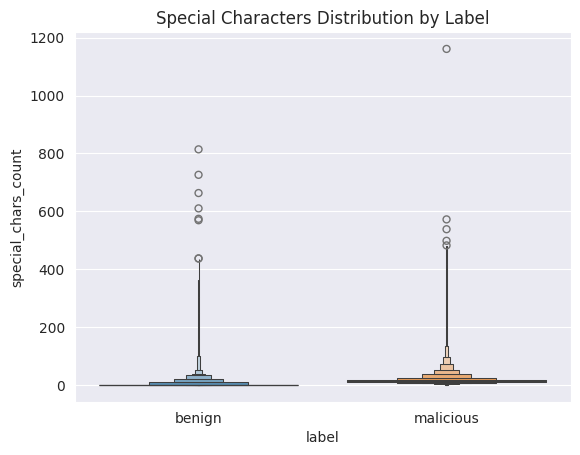

Statistics for Special Characters by Label


,count,mean,std,min,50%,90%,95%,99%,max
label,,,,,,,,,
benign,117377.0,4.220810,15.254838,0.0,0.0,13.0,27.0,42.0,814.0
malicious,16599.0,16.830231,23.094954,0.0,12.0,29.0,39.0,87.0,1161.0


In [12]:
# Count number of special characters in each payload
data["special_chars_count"] = data["payload"].apply(lambda x: len(re.findall(r"[^a-zA-Z0-9\s]", x)))

# Boxen plot to visualize the distribution of special characters by label
sns.boxenplot(data=data, x="label", y="special_chars_count", hue="label")
plt.title("Special Characters Distribution by Label")
plt.show()

# Print statistics for special characters by label
print("Statistics for Special Characters by Label")
data.groupby("label")["special_chars_count"].describe(percentiles=[0.9, 0.95, 0.99])

### 4.2 SQL and JavaScript Keywords Analysis

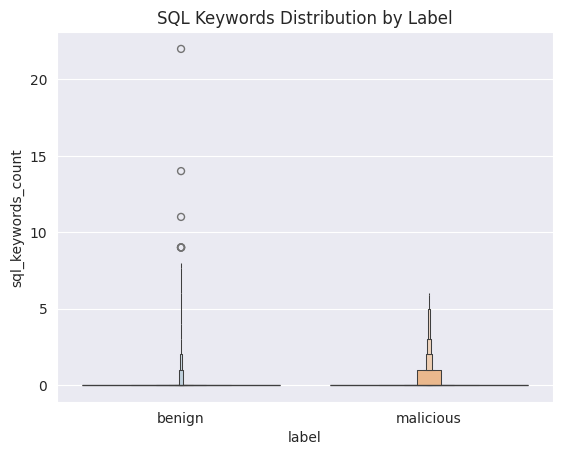

Statistics for SQL Keywords by Label


,count,mean,std,min,50%,90%,95%,99%,max
label,,,,,,,,,
benign,117377.0,0.011110,0.198985,0.0,0.0,0.0,0.0,0.0,22.0
malicious,16599.0,0.076993,0.417678,0.0,0.0,0.0,0.0,2.0,6.0


In [13]:
sql_keywords = ["SELECT", "INSERT", "UPDATE", "DELETE", "FROM", "WHERE", "UNION", "ORDER", "AND", "OR", "DROP", "EXEC", "NULL"]

# Count number of SQL keywords in each payload
data["sql_keywords_count"] = data["decoded_payload"].apply(
    lambda x: sum([1 for word in x.split() if word.upper() in sql_keywords])
)

# Boxen plot to visualize the distribution of SQL keywords by label
sns.boxenplot(data=data, x="label", y="sql_keywords_count", hue="label")
plt.title("SQL Keywords Distribution by Label")
plt.show()

# Print statistics for SQL keywords by label
print("Statistics for SQL Keywords by Label")
data.groupby("label")["sql_keywords_count"].describe(percentiles=[0.9, 0.95, 0.99])

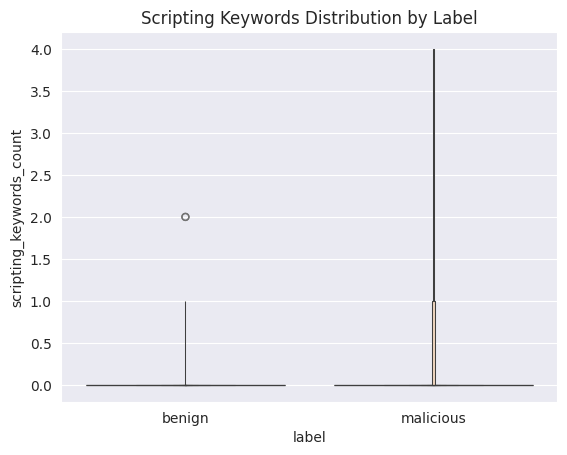

Statistics for Scripting Keywords by Label


,count,mean,std,min,50%,90%,95%,99%,max
label,,,,,,,,,
benign,117377.0,0.000179,0.014593,0.0,0.0,0.0,0.0,0.0,2.0
malicious,16599.0,0.008856,0.134374,0.0,0.0,0.0,0.0,0.0,4.0


In [14]:
scripting_keywords = ["SCRIPT", "ALERT", "PROMPT", "FUNCTION", "VAR", "EVAL", "ONLOAD", "ONCLICK"]

# Count number of scripting keywords in each payload
data["scripting_keywords_count"] = data["decoded_payload"].apply(
    lambda x: sum([1 for word in x.split() if word.upper() in scripting_keywords])
)

# Boxen plot to visualize the distribution of scripting keywords by label
sns.boxenplot(data=data, x="label", y="scripting_keywords_count", hue="label")
plt.title("Scripting Keywords Distribution by Label")
plt.show()

# Print statistics for scripting keywords by label
print("Statistics for Scripting Keywords by Label")
data.groupby("label")["scripting_keywords_count"].describe(percentiles=[0.9, 0.95, 0.99])

### 4.4 Common Word Analysis

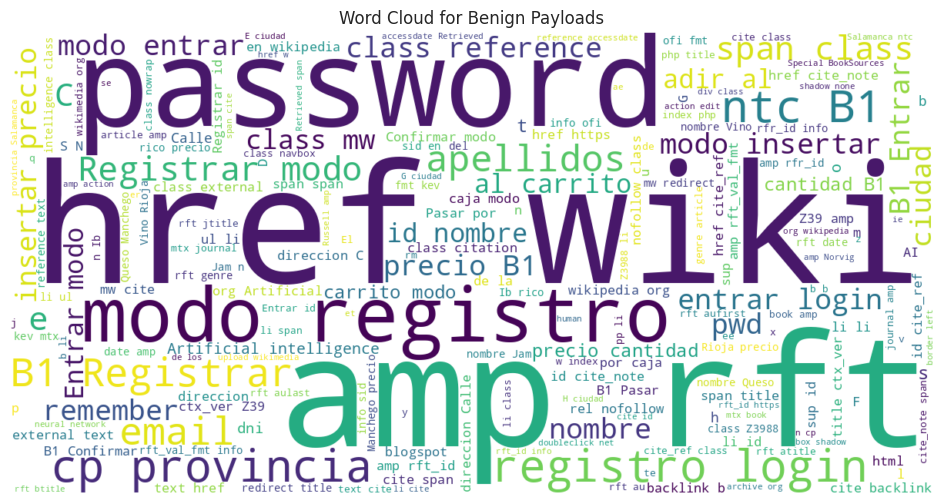

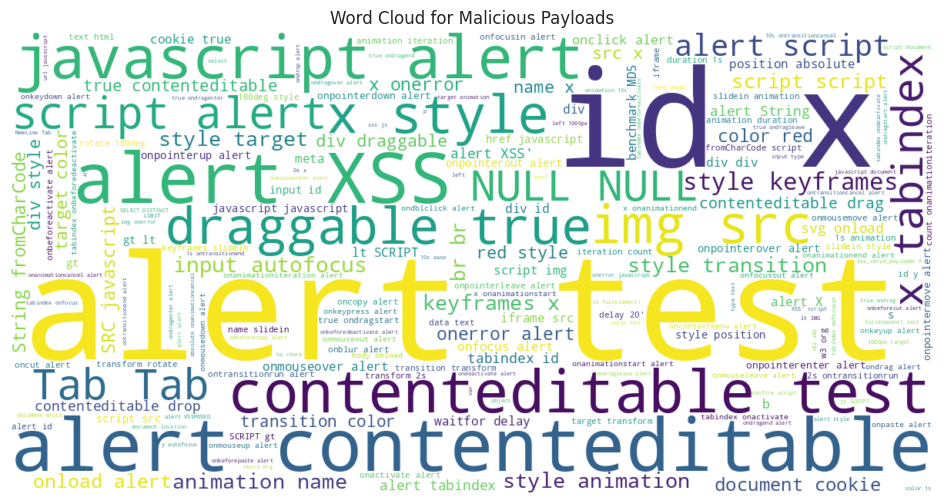

In [15]:
# Generating word clouds for benign and malicious samples
benign_text = " ".join(data[data["label"] == "benign"]["decoded_payload"])
malicious_text = " ".join(data[data["label"] == "malicious"]["decoded_payload"])

wordcloud_benign = WordCloud(width=1200, height=600, background_color="white").generate(benign_text)
wordcloud_malicious = WordCloud(width=1200, height=600, background_color="white").generate(malicious_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_benign, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Benign Payloads")
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_malicious, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Malicious Payloads")
plt.show()

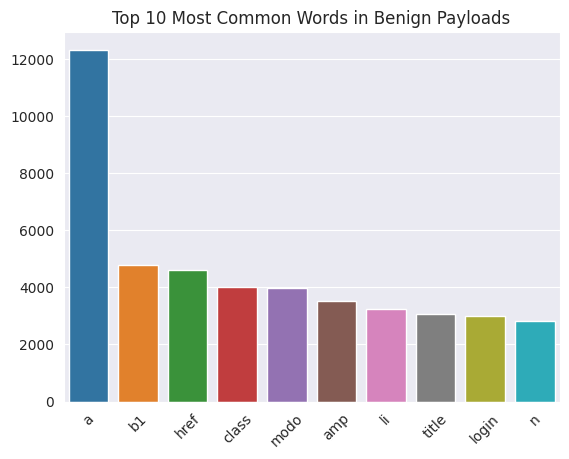

Top 10 Most Common Words in Benign Payloads
a: 12337
b1: 4801
href: 4612
class: 4009
modo: 3975
amp: 3531
li: 3250
title: 3067
login: 3007
n: 2826


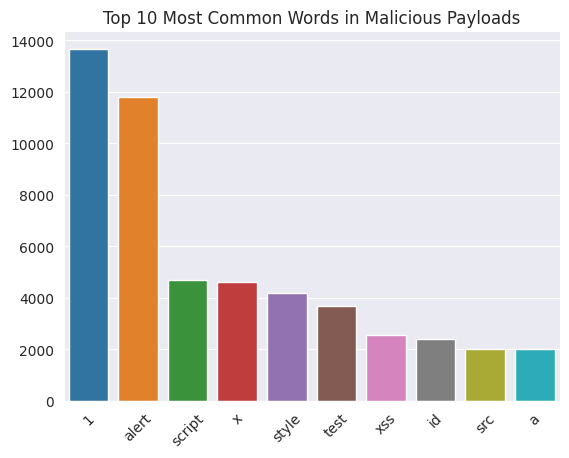

Top 10 Most Common Words in Malicious Payloads
1: 13669
alert: 11818
script: 4700
x: 4637
style: 4183
test: 3686
xss: 2546
id: 2426
src: 2032
a: 2029


In [16]:
benign_payloads = data[data["label"] == "benign"]["decoded_payload"]
malicious_payloads = data[data["label"] == "malicious"]["decoded_payload"]


# A function to get all words from a text
def get_words(text):
    return re.findall(r"\w+", text.lower())


benign_word_counts = Counter(get_words(" ".join(benign_payloads.values)))
malicious_word_counts = Counter(get_words(" ".join(malicious_payloads.values)))

# Display top 10 most common words in benign payloads
top_benign_words = benign_word_counts.most_common(10)

words, counts = zip(*top_benign_words)
sns.barplot(x=words, y=counts, hue=words)
plt.title("Top 10 Most Common Words in Benign Payloads")
plt.xticks(rotation=45)
plt.show()

# Print top 10 most common words in benign payloads
print("Top 10 Most Common Words in Benign Payloads")
for word, count in top_benign_words:
    print(f"{word}: {count}")

# Display top 10 most common words in malicious payloads
top_malicious_words = malicious_word_counts.most_common(10)

words, counts = zip(*top_malicious_words)
sns.barplot(x=words, y=counts, hue=words)
plt.title("Top 10 Most Common Words in Malicious Payloads")
plt.xticks(rotation=45)
plt.show()

# Print top 10 most common words in malicious payloads
print("Top 10 Most Common Words in Malicious Payloads")
for word, count in top_malicious_words:
    print(f"{word}: {count}")

The top 10 most common words in benign and malicious payloads offer interesting insights:

- **Benign Payloads**: Words like 'href', 'class', 'li', and 'title' dominate, indicating structured data or web content.
- **Malicious Payloads**: Keywords like 'alert', 'script', 'xss', and 'src' point towards potential scripting and injection attempts.

## 4.5 Correlation Analysis

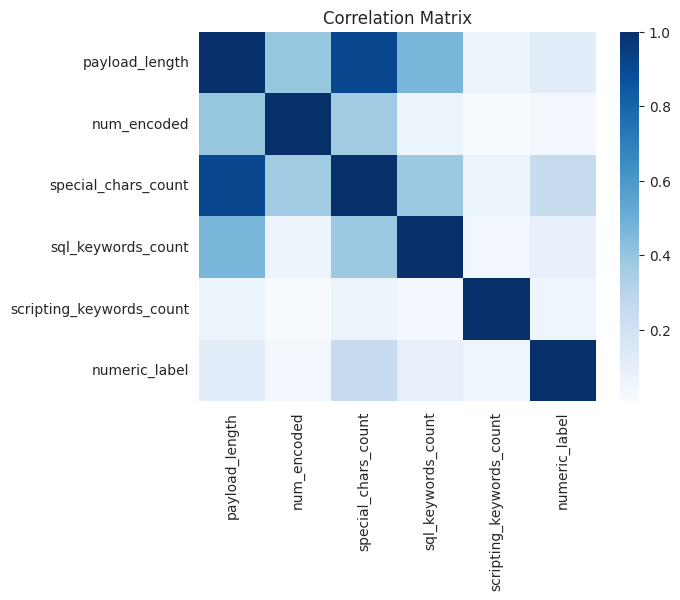

Correlation Matrix


,payload_length,num_encoded,special_chars_count,sql_keywords_count,scripting_keywords_count,numeric_label
payload_length,1.000000,0.398772,0.913316,0.467711,0.065532,0.118908
num_encoded,0.398772,1.000000,0.374653,0.063271,0.008480,0.039393
special_chars_count,0.913316,0.374653,1.000000,0.384512,0.068373,0.245131
sql_keywords_count,0.467711,0.063271,0.384512,1.000000,0.039235,0.091098
scripting_keywords_count,0.065532,0.008480,0.068373,0.039235,1.000000,0.057973
numeric_label,0.118908,0.039393,0.245131,0.091098,0.057973,1.000000


In [17]:
data["numeric_label"] = data["label"].map({"benign": 0, "malicious": 1})

numeric_columns = [
    "payload_length",
    "num_encoded",
    "special_chars_count",
    "sql_keywords_count",
    "scripting_keywords_count",
    "numeric_label",
]

corr = data[numeric_columns].corr()
sns.heatmap(corr, cmap="Blues").set(title="Correlation Matrix")
plt.show()

print("Correlation Matrix")
display(corr)

## 5. Conclusion

Throughout my comprehensive exploratory data analysis, several key observations emerged that will guide the subsequent modeling endeavors. Here's a succinct summary of the insights I gathered:


1. **Dataset Overview**:
    * The dataset consists of 133,976 payloads.
    * There are two unique labels: `benign` and `malicious`.
    * Four unique categories are observed: `benign`, `sql`, `xss`, and `shell`.
    * 12.39% of payloads are labeled malicious.
    * The most common category is `benign`, followed by `xss`, `sql`, and then `shell`.

2. **Payload Characteristics**:
    * The majority of payloads (50% percentile) have a length of around 10 characters, but this number can go as high as 5911 characters.
    * 21,504 payloads are URL encoded.
    * The mean length for malicious payloads stands at 66.1 characters, while benign ones average 33.8 characters.

3. **Category Specific Characteristics**:
    * `xss` payloads tend to be the longest among malicious categories, with a mean length of 104.0 characters.
    * `shell` payloads have a mean length of 29.2, and `sql` payloads have a mean length of 45.6.
    * In terms of payload length variability, `xss` has the highest standard deviation followed by `sql` and then `shell`.

4. **Special Characters & Keywords**:
    * Malicious payloads tend to have more special characters compared to benign ones. On average, malicious payloads contain 16.8 special characters, in contrast to the 4.2 in benign payloads.
    * SQL keywords are slightly more prevalent in malicious payloads compared to benign ones.
    * Scripting keywords are observed more in malicious payloads but in low numbers.

5. **Common Words**:
    * In benign payloads, words seem to relate more to web elements like `a`, `href`, `class`, `li`, and `title`.
    * In malicious payloads, words like `alert`, `script`, and `xss` dominate, indicating common attack patterns in cross-site scripting (XSS).

6. **Correlation Matrix**:
    * There is a strong positive correlation (0.913316) between payload length and the number of special characters. This is expected since longer payloads can contain more characters, including special ones.
    * There's also a notable positive correlation (0.467711) between payload length and SQL keywords count. This suggests that SQL-based payloads tend to be longer.
    * The `label` has a moderate positive correlation with `special_chars_count` (0.245131) indicating that the presence of more special characters could be a sign of malicious intent.

**Implications for Modeling:**
1. The significant class imbalance might necessitate techniques such as oversampling, undersampling, or class weighting to ensure that the model doesn't overfit to the majority class.
2. The pronounced presence of specific words and characters in malicious payloads suggests that crafting features around these elements might enhance the model's efficacy.
3. The payload length and the number of special characters are positively correlated with the label, but are highly correlated with each other. This might indicate that the model only needs one of these features to make a prediction.
4. The sequential nature of the data indicates that sequence-based models, like RNNs or Transformers, might be suitable for this task.
